# DBS Associat MLE Assessment
## Section A

### Question 1
#### (a) Formulate a hypothesis between x, y, f_xy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()    #set seaborn format

In [2]:
# load data
df = pd.read_csv('./data/section_a_question_1.csv')

In [3]:
# rough sample
df.sample(10)

,x,y,f_xy
28,0.088493,0.195983,3.191019
0,0.374540,0.950714,0.157131
15,0.607545,0.170524,1.151325
38,0.771270,0.074045,0.966068
3,0.058084,0.866176,0.204051
42,0.310982,0.325183,1.385803
9,0.431945,0.291229,1.023033
1,0.731994,0.598658,0.171344
5,0.020584,0.969910,0.350770
23,0.311711,0.520068,0.656929


In [4]:
df.shape

(50, 3)

There are 50 data points with 3 columns.


In the sample 

0 < x < 1, 0 < y < 1, 0 < f(x,y) < 6


$\bar{x}$ = 0.440717, $\bar{y}$ = 0.499645, f(x,y)ave = 0.944342




In [5]:
df.describe()

,x,y,f_xy
count,50.000000,50.000000,50.000000
mean,0.440717,0.499645,0.944342
std,0.301266,0.293723,1.055559
min,0.005522,0.046450,0.014130
25%,0.162470,0.202122,0.228495
50%,0.381609,0.504706,0.570853
75%,0.723919,0.763601,1.189915
max,0.969585,0.986887,5.134299


Text(0.5, 1.0, 'f_xy distribution')

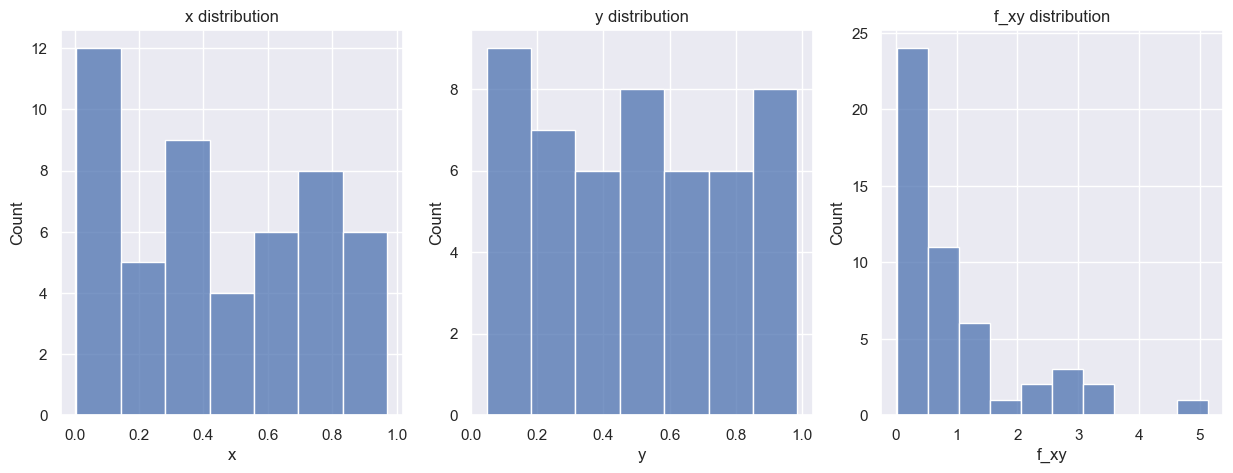

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.histplot(df['x'],ax=axes[0])
axes[0].set_title('x distribution')
sns.histplot(df['y'],ax=axes[1])
axes[1].set_title('y distribution')
sns.histplot(df['f_xy'],ax=axes[2])
axes[2].set_title('f_xy distribution')

There is slight imbalance to X with more data points near 0. Also more data points of f_xy near 0 too. There may be some 'pull' of f_xy on x and y. Use a scatterplot to better visualise

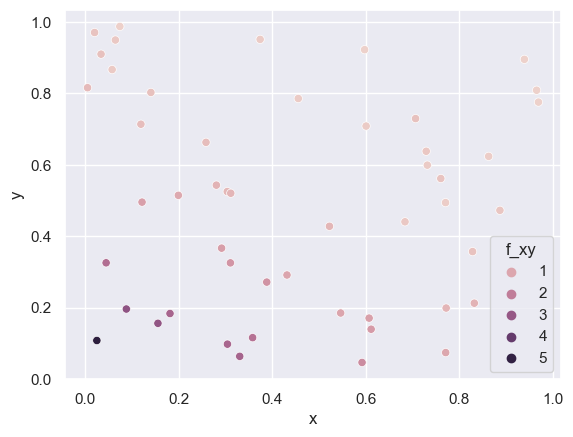

In [7]:
sns.scatterplot(x='x', y='y', data=df, hue='f_xy');

Using intuition about the resultant f_xy tending to 0 and also the radial gradient of f_xy, I will estimate that f_xy is proportionate to its distance to 0 on the x-y dimension. We will use distance equation 

In [8]:
df['hyp'] = df.x**2 + df.y**2
df['hyp'] = np.sqrt(df['hyp'])

In [9]:
pd.concat(    # displaying the difference in values
    [df,
     df[['f_xy','hyp']].diff().rename(columns={'f_xy':'f_diff','hyp':'h_diff'})
    ], axis=1
).head()

,x,y,f_xy,hyp,f_diff,h_diff
0,0.374540,0.950714,0.157131,1.021831,NaN,NaN
1,0.731994,0.598658,0.171344,0.945625,0.014213,-0.076205
2,0.156019,0.155995,3.129805,0.220627,2.958461,-0.724999
3,0.058084,0.866176,0.204051,0.868121,-2.925754,0.647495
4,0.601115,0.708073,0.169634,0.928820,-0.034416,0.060698


`hyp` have similar patterns to `f_xy`
- Taking index 0, 1 we can see that values are close to each other 
- Taking index 1, 2 we can see that is far apart relative to 0, 1


However,
- from index 0, 1 and 1, 2 `f_xy` is increasing but hyp is decreasing


Due to this difference, we will assume an inverse relationship 

In [10]:
df['hyp'] = 1/df['hyp']
df.head()

,x,y,f_xy,hyp
0,0.374540,0.950714,0.157131,0.978636
1,0.731994,0.598658,0.171344,1.057501
2,0.156019,0.155995,3.129805,4.532545
3,0.058084,0.866176,0.204051,1.151913
4,0.601115,0.708073,0.169634,1.076635


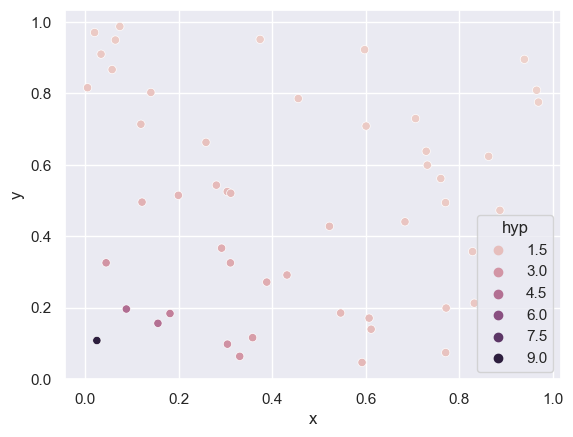

In [11]:
sns.scatterplot(x='x', y='y', data=df, hue='hyp');

Made a plot below as a sanity check. `hyp` and `f_xy` now look to have a closer relationship. There may be some bias or scaling involved. So I will assume the function below as my hypothesis


f_xy proportionate to 1/sqrt(x^2+y^2)


i.e. f_xy = a/sqrt(x^2+y^2) + b


#### (b) Justify your choice of function and provide best guess for unknown params
In this case we will use OLS using above hypothesis and check R, F score and take the estimate for a and b.


Intuition is that since datapoints are centering around origin, there is no transform away from origin and b = 0. We can test this first.

In [12]:
import statsmodels.api as sm

#prepare x variable as 1/sqrt(x^2+y^2)
x = 1/np.sqrt(df.x**2+df.y**2)
y = df.f_xy

result = sm.OLS(y, x).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   f_xy   R-squared (uncentered):                   0.921
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                              568.3
Date:                Thu, 04 Apr 2024   Prob (F-statistic):                    1.30e-28
Time:                        15:55:02   Log-Likelihood:                         -24.734
No. Observations:                  50   AIC:                                      51.47
Df Residuals:                      49   BIC:                                      53.38
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6011      0.025     23.838      0.000       0.550       0.652
==============================================================================
Omnibus:                        9.696   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.922
Skew:                           1.087   Prob(JB):                      0.00701
Kurtosis:                       3.199   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R is more than 90% which is a good sign. F statistic is large indicating a significance of this relationship. We also test if b has a possible value in regression nbelow

In [13]:
x = sm.add_constant(x)

result = sm.OLS(y, x).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   f_xy   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     417.6
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           2.51e-25
Time:                        15:55:03   Log-Likelihood:                -16.343
No. Observations:                  50   AIC:                             36.69
Df Residuals:                      48   BIC:                             40.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3486      0.080     -4.376      0.000      -0.509      -0.188
0              0.7242      0.035     20.435      0.000       0.653       0.795
==============================================================================
Omnibus:                        6.115   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                6.578
Skew:                           0.405   Prob(JB):                       0.0373
Kurtosis:                       4.582   Cond. No.                         4.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To avoid some risk of overfitting we can take the simpler regression above and take the function to be 


>f_xy ~ 	0.6011/sqrt(x^2+y^2)
>
>
>with a significant R value and p-value < 0.001.


#### (c)(i) Find the PDF of W = Y/X

In [14]:
import sympy as sp

# Define symbols
x, y, w = sp.symbols('x y w', real=True, positive=True)

# Define the joint PDF function
f_xy = 0.6011 / sp.sqrt(x**2 + y**2)

# Define the transformation function
W 
= y / x

# Perform the transformation
f_W = f_xy.subs(y, W*x) / sp.Abs(sp.diff(W, x))

# Print the result
print("PDF of W:")
sp.pprint(f_W.simplify())

PDF of W:
          2   
  0.6011⋅x    
──────────────
     _________
    ╱  2    2 
y⋅╲╱  x  + y  


#### (c)(ii) Find P(X < Y)
Since W = Y/X,


Then X < Y ==> W > 1 


and we will find CDF of P(W>1)

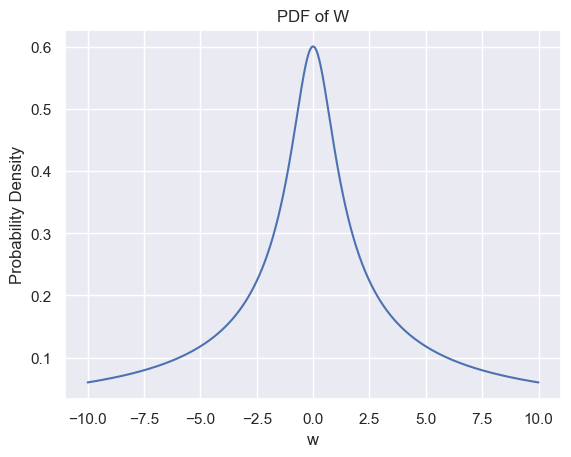

In [15]:
# Define the range of w values
w_values = np.linspace(-10, 10, 1000)  # Adjust the range as needed

# Define the PDF function for W
def f_W(w):
    return 0.6011 / np.sqrt(1 + w**2)

# Evaluate the PDF values for the range of w values
pdf_values = f_W(w_values)

# Plot the PDF
plt.plot(w_values, pdf_values)
plt.xlabel('w')
plt.ylabel('Probability Density')
plt.title('PDF of W')
plt.grid(True)
plt.show()

In [16]:
# Define symbols
w = sp.symbols('w', real=True, positive=True)

# Define the PDF function for W
f_W = 0.6011 / sp.sqrt(1 + w**2)

# Compute the probability P(W > 1)
probability = sp.integrate(f_W, (w, 1, sp.oo))

# Print the result
print("P(W > 1):", probability.evalf())

P(W > 1): oo


In [17]:
# Compute the probability P(0 < W < 1)
probability = sp.integrate(f_W, (w, 0, 1))

# Print the result
print("P(0 < W < 1):", probability.evalf())

P(0 < W < 1): 0.529793663157447


>The integral of the function is not 1, indicating it is not a valid PDF. This may be due to incorrect estimate of f_xy.


>However, if the distribution was symmetric and centralised around W = 0, then we can assume 50% CDP on the right then deduct P(0<W<1) to get P(W>1) == P(X<Y).

### Question 2
#### (a)(i) Use Majority Voting to find the expected error rate of the ensemble
Some definitions:
- Error rate is all misclassified datapoints over all predictions. Error rate = 1 - accuracy = FP + FN) / (TP + TN + FP + FN)
- Majority Voting for same dataset, each algorithms predicts and casts  votes of outcome with final prediction determined by the majority's decision.


We can calculate probability of all erroneous scenarios occuring assuming predictors are independent by calculating the cumulative probability of all erroneous permutations (or all the ways the ensemble predictor is incorrect). 


Predictor = (P1, P2, P3) and where 0 = incorrect, 1 = correct,

    Universe of outcomes = {
    (0, 0, 0)
    (0, 0, 1)
    (0, 1, 0)
    (0, 1, 1)
    (1, 0, 0)
    (1, 0, 1)
    (1, 1, 0)
    (1, 1, 1)
    }


    there are 4 scenarios out of 8 lead to erroneous results 
    {(0, 0, 0)
    (0, 0, 1)
    (0, 1, 0)
    (1, 0, 0)}

In [18]:
# Define the data
data = [(0, 0, 0), (0, 0, 1), (0, 1, 0), (1, 0, 0)]

# Create a DataFrame
df = pd.DataFrame(data, columns=['C1', 'C2', 'C3'])

# Define the constants
error_rates = [0.1, 0.3, 0.3]

# Apply transformations
for i, col in enumerate(df.columns):
    df[f'New_{col}'] = df[col].apply(
        lambda x: error_rates[i] if x == 0 else x * (1 - error_rates[i]))

df.columns = ['C1', 'C2', 'C3', 'p1', 'p2', 'p3']

# Find joint probabilities of incorrect prediction
df['perror'] = df.p1*df.p2*df.p3

print(df)
print(f'\n\nExpected error rate of the ensemble: \
      {df.perror.sum()*100:.1f}%')

   C1  C2  C3   p1   p2   p3  perror
0   0   0   0  0.1  0.3  0.3   0.009
1   0   0   1  0.1  0.3  0.7   0.021
2   0   1   0  0.1  0.7  0.3   0.021
3   1   0   0  0.9  0.3  0.3   0.081
Expected error rate of the ensemble:       13.2%


> The ensemble error rate is less than either predictor 2 or 3 but more than predictor 1. There is a small chance all 3 predictors are wrong (at 0.9%) but cases where only 2 are wrong cumulates error more than 12%.

#### (a)(ii) and show the error propagation diagrammatically

In [19]:
# Define the constants
likelihood_of_error = [0.1, 0.3, 0.3]

# Generate random samples
samples = np.zeros((10_000, 3))

for i, prob in enumerate(likelihood_of_error):
    samples[:, i] = np.random.choice([0, 1], size=10_000, p=[prob, 1 - prob])

# Create a DataFrame from the samples
df = pd.DataFrame(samples, columns=['p1', 'p2', 'p3'])

# Calculate the mode of the first three columns
df['ensemble'] = df[['p1', 'p2', 'p3']].mode(axis=1)

# Print the DataFrame with the prediction column
print(df)


       p1   p2   p3  ensemble
0     1.0  1.0  0.0       1.0
1     1.0  1.0  1.0       1.0
2     1.0  1.0  0.0       1.0
3     1.0  1.0  1.0       1.0
4     1.0  0.0  0.0       0.0
...   ...  ...  ...       ...
9995  1.0  0.0  1.0       1.0
9996  1.0  1.0  1.0       1.0
9997  1.0  1.0  1.0       1.0
9998  1.0  1.0  1.0       1.0
9999  1.0  1.0  1.0       1.0

[10000 rows x 4 columns]


In [20]:
errors = 1-df.mean()

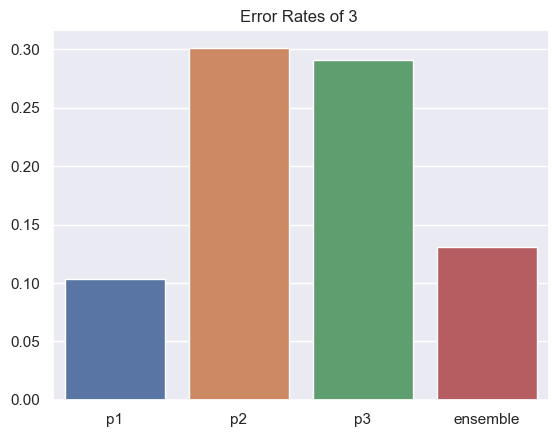

In [21]:
sns.barplot(x=errors.index, y=errors.values)
plt.title('Error Rates of 3 classifiers and Ensemble');

In [22]:
errors

p1          0.1038
p2          0.3014
p3          0.2911
ensemble    0.1306
dtype: float64

C1 --> p1 | 
C2 --> p2 | 
C3 --> p3 


mode(p1, p2, p3) --> prediction

---

#### (b) What can be inferred if the assumption of independence is relaxed on the errors


Heteroscedasticity: Correlated errors can also lead to heteroscedasticity, where the variance of the errors is not constant across observations. This violates the assumption of homoscedasticity in linear regression models and can affect the precision of parameter estimates and the validity of hypothesis tests.


Autocorrelation: If errors are correlated over time (autocorrelation), it indicates that the current error term is related to the past error terms. This violates the assumption of independence in time series data and may require time series modeling techniques to account for the autocorrelation structure.


Model fit: Ignoring correlated errors can lead to misspecification of the model, resulting in poor model fit and inaccurate predictions. It's important to diagnose and address any correlation or dependence among errors to improve the reliability and validity of the model.


> In conclusion the accuracy of the model cannot be explained with aggregated accuracy and precision easily. To make the existing model to be applicable there must be sufficient large sample dataset to represent the population and universe of permutations. Or the predictive capability must be limited a known set of range of dependent variables before error rates and accuracy can be taken at face value. Else the model must consider each individual predictor as independent variables also.

---

### Question 3

In [23]:
# make train data as df for faster calculations
train = [
    ('s', 42.5, 'n', 'f', 'n'),
    ('s', 42.5, 'h', 't', 'n'),
    (None, 42.5, 'h', 'f', 'y'),
    ('r', None , 'h', 'f', 'y'),
    ('r', 22.8, 'n', 'f', 'y'),
    ('r', 15.4, 'n', 't', 'n')
]

df_train = pd.DataFrame(train, columns=['x1', 'x2', 'x3', 'x4', 'y'])

df_train

,x1,x2,x3,x4,y
0,s,42.5,n,f,n
1,s,42.5,h,t,n
2,None,42.5,h,f,y
3,r,NaN,h,f,y
4,r,22.8,n,f,y
5,r,15.4,n,t,n


# make calculations for the first test data
We will take the general Bayes theorem per below
![bayes](http://mathurl.com/yd5wgr73.png)

![bayes2](https://miro.medium.com/v2/resize:fit:640/format:webp/1*1eTZdwSU6d4ApGNlvp9zHw.png)

![bayes3](https://miro.medium.com/v2/resize:fit:640/format:webp/1*7JKaSvDoyQOwGzGqCG-QDQ.png)


---
    P(X | y=Y) = P(x1 | Y) X P(x2 | Y) X P(x3 | Y) X P(x4 | Y)

---

##### For first test data x = ('o', 25.0, 'n', 't')

We calculate for both outcomes 'y' and 'n'. `x1=O` is not present. We will add [pseudocount](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#:~:text=incorporate%20a%20small%2Dsample%20correction%2C%20called%20pseudocount%2C%20in%20all%20probability%20estimates%20such%20that%20no%20probability%20is%20ever%20set%20to%20be%20exactly%20zero.%20This%20way%20of%20regularizing%20naive%20Bayes%20is%20called%20Laplace%20smoothing%20when%20the%20pseudocount%20is%20one%2C%20and%20Lidstone%20smoothing%20in%20the%20general%20case.) to incorporate a small-sample correction, called pseudocount, in all probability estimates such that no probability is ever set to be exactly zero. This way of regularizing naive Bayes is called Laplace smoothing when the pseudocount is one, and Lidstone smoothing in the general case.


     P(X|y=Y) = P(x1='o'|Y) 
                X P(x2=25.0|Y) 
                X P(x3='n'|Y) 
                X P(x4='t'|Y)
                
                

- `P(x1='o'|Y)` = 1/5    # 1 'o', 1 's', 3 'r'
- `P(x2=25.0|Y)` = 0.0246 (computation further below)
- `P(x3='n'|Y)` = 2/5    # 2 'n', 3 'h'
- `P(x4='t'|Y)` = 1/5    # 4 'f', 1 't'
              
              
              
                
        P(X|y=N) = P(x1='o'|N) 
                X P(x2=25.0|N) 
                X P(x3='n'|N) 
                X P(x4='t'|N)



- `P(x1='o'|N)` = 1/6    # 1 'o', 3 's', 2'r'
- `P(x2=25.0|N)` = 0.0220 (computation further below)
- `P(x3='n'|N)` = 2/5    # 3 'n', 2 'h'
- `P(x4='t'|N)` = 3/5    # 3 't', 2 'f'

In [24]:
df_train[df_train['y']=='y']

,x1,x2,x3,x4,y
2,None,42.5,h,f,y
3,r,NaN,h,f,y
4,r,22.8,n,f,y


In [25]:
 df_train[df_train['y']=='n']

,x1,x2,x3,x4,y
0,s,42.5,n,f,n
1,s,42.5,h,t,n
5,r,15.4,n,t,n


In [26]:
# finding mean and variance of x2 when y='y'
# ignoe NaN values during calculation
x2_mean_y = df_train[df_train['y']=='y']['x2'].mean()
x2_var_y = df_train[df_train['y']=='y']['x2'].var()

# finding mean and variance of x2 when y='n'
x2_mean_n = df_train[df_train['y']=='n']['x2'].mean()
x2_var_n = df_train[df_train['y']=='n']['x2'].var()

# finding conditional Gaussian probability for test1
# using the above means and vars
p_x2_y_test1 = 1 / np.sqrt(2 * np.pi * x2_var_y) * \
                np.exp(-(25 - x2_mean_y) ** 2 / (2 * x2_var_y))
p_x2_n_test1 = 1 / np.sqrt(2 * np.pi * x2_var_n) * \
                np.exp(-(25 - x2_mean_n) ** 2 / (2 * x2_var_n))
p_x2_y_test1, p_x2_n_test1

(0.02463025322518082, 0.022024970873542677)

In [130]:
# calculating P(X|y=Y), P(X|y=N) for test1
p_x_y_test1 = 1/5 * p_x2_y_test1 * 2/5 * 1/5
p_x_n_test1 = 1/6 * p_x2_n_test1 * 2/5 * 3/5

# multiply by prior and compare P(X|y=Y) to P(X|y=N)
p_x_y_test1*3/6, p_x_n_test1*3/6

(0.00019704202580144657, 0.00044049941747085347)

> Since `P(X|Y) * P(Y) < P(X|N) * P(N)`, 
>
>
>Then predict that the first test term will be `N`

##### For second test data x = ('s', 36.4, None, 'f')

We calculate for both outcomes 'y' and 'n'. We remove `x3` since there is no value and no information can be taken from that variable.

     P(X|y=Y) = P(x1='s'|Y) 
                X P(x2=36.4|Y) 
                X P(x4='f'|Y)
                

- `P(x1='s'|Y)` = 1/5    # 1 'o', 1 's', 3 'r'
- `P(x2=36.4|Y)` = 0.0276 (computation further below)
- `P(x4='f'|Y)` = 4/5    # 4 'f', 1 't'
              
              
              

         P(X|y=N) = P(x1='s'|N) 
                    X P(x2=36.4|N) 
                    X P(x4='f'|N)



- `P(x1='s'|N)` = 3/6    # 1 'o', 3 's', 2 'r'
- `P(x2=36.4|N)` = 0.0251 (computation further below)
- `P(x4='f'|N)` = 2/5    # 3 't', 2 'f'

In [28]:
# finding conditional Gaussian probability for test2
p_x2_y_test2 = 1 / np.sqrt(2 * np.pi * x2_var_y) * \
                np.exp(-(36.4 - x2_mean_y) ** 2 / (2 * x2_var_y))
p_x2_n_test2 = 1 / np.sqrt(2 * np.pi * x2_var_n) * \
                np.exp(-(36.4 - x2_mean_n) ** 2 / (2 * x2_var_n))
p_x2_y_test2, p_x2_n_test2

(0.027619900587299257, 0.025053535726665115)

In [131]:
# calculating P(X|y=Y),P(X|y=N) for test2
p_x_y_test2 = 1/5 * p_x2_y_test2 * 4/5
p_x_n_test2 = 3/6 * p_x2_n_test2 * 2/5

# multiply by prior and compare P(X|y=Y) to P(X|y=N)
p_x_y_test2*3/6, p_x_n_test2*3/6

(0.002209592046983941, 0.0025053535726665115)

> Since `P(X|Y) * P(Y) < P(X|N) * P(N)`, 
> 
> 
> Then predict that the second test term will be `N`

---

### Question 4

(a) Write `get_indices`

In [38]:
data_a = [('id1', 'addr1', 'pw1'), ('idz', 'addrz', 'pwz'), ('idx', 'addr1', 'pwx'), ('idy', 'addry', 'pwx')]


In [97]:
def get_indices(data: list) -> None:
    """
    Takes a list of tuples and returns a 2D list of indices. 
    Each sub-list corresponds to the indices of all rows pointing to the same person. 
    Rows point to the same person if any of their column entries are the same.

    Parameters
    ----------
    data : list of tuples
    """
    def add_tuple(tt: tuple, tuple_number: int, index: dict) -> dict:    # fxn to add tuple to idx
        new_index_no = len(index)
        index[new_index_no]=[]
        for col_val in tt:     # add a set in for each col
            index[new_index_no].append({col_val})
        index[new_index_no].append([tuple_number])
        return index
    
    idx = {}
    
    
    for tpl_no, tpl in enumerate(data):
        if len(idx) == 0:    # initialise index
            idx = add_tuple(tpl, tpl_no, idx)    # create new item in index
            break
        else:    # there is an index
            for col_no, col_val in enumerate(tpl):    # iter tpl
                for key, row in idx.items():    # iter rows of idx
                    if col_val in row[col_no]:
                        # add tuple to index[key]
                        # continue
                
                        
                        
    
    
    
    
    print(idx)
        
"""
    else:    # idx has reference values
                for i, col_val in enumerate(tpl):     # run through tuple items
                    for key, item in idx.items():     # run through ids items
                        if col_val in item[i]:    # if item is in same col
                            for col_val in tpl:     # add a set in for each col
                                print(col_val)

    raise NotImplementedError("Method not implemented")
"""
    


'\n    else:    # idx has reference values\n                for i, col_val in enumerate(tpl):     # run through tuple items\n                    for key, item in idx.items():     # run through ids items\n                        if col_val in item[i]:    # if item is in same col\n                            for col_val in tpl:     # add a set in for each col\n                                print(col_val)\n\n    raise NotImplementedError("Method not implemented")\n'

In [98]:
get_indices(data_a)

{0: [{'id1'}, {'addr1'}, {'pw1'}, [0]]}


In [100]:
data_a

[('id1', 'addr1', 'pw1'),
 ('idz', 'addrz', 'pwz'),
 ('idx', 'addr1', 'pwx'),
 ('idy', 'addry', 'pwx')]

In [101]:
# Define the data
data_a = [('id1', 'addr1', 'pw1'), ('idz', 'addrz', 'pwz'), ('idx', 'addr1', 'pwx'), ('idy', 'addry', 'pwx')]

# Convert to DataFrame
df = pd.DataFrame(data_a, columns=['ID', 'Address', 'Password'])

# Display the DataFrame
print(df)


    ID Address Password
0  id1   addr1      pw1
1  idz   addrz      pwz
2  idx   addr1      pwx
3  idy   addry      pwx


In [105]:
a = df.index.to_series().groupby(df['ID']).unique()

In [106]:
b = df.index.to_series().groupby(df['Address']).unique()

In [107]:
c = df.index.to_series().groupby(df['Password']).unique()

In [116]:
for index, value in a.items():
    print(f"Index : {index}, Value : {value}")

Index : id1, Value : [0]
Index : idx, Value : [2]
Index : idy, Value : [3]
Index : idz, Value : [1]


In [125]:
set(df[df['Address']=='addr1'].index)

{0, 2}

In [126]:
set(df['Address'])

{'addr1', 'addry', 'addrz'}

### Question 5